[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/abiraihan/geoshapes.git/master)
[![Project Status: Active – The project has reached a stable, usable state and is being actively developed.](https://www.repostatus.org/badges/latest/active.svg)](https://www.repostatus.org/#active)
[![PyPI version](https://badge.fury.io/py/geoshapes.svg)](https://badge.fury.io/py/geoshapes)

## mergeShape

In [1]:
import shapely, geopandas
from geoshapes import splitShape
!conda config --set always_yes yes --set changeps1 no
!conda install geopandas
try:
    import matplotlib
except ModuleNotFoundError:
    !pip install matplotlib
%matplotlib inline

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



### Create a psuedo Polygon geometry for processing
####   - Split a polygon geometry

In [2]:
def getSplitedGeoms(geoms, split, rotation):
    
    splitGeometry = splitShape.splitGeom(geoms, split, rotation = rotation)
    splitGeometry['ids'] = range(len(splitGeometry))
    ax = splitGeometry.plot(figsize = (7,7), alpha = 0.9, cmap = 'Spectral', edgecolor = 'k', linewidth = 2)
    splitGeometry.apply(
        lambda x: ax.annotate(
            text=f"{x.ids}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=10),axis=1
        )
    return splitGeometry

  -- Found rotation angle 120 degree
  -- Analyzing suitable radians for the major axis at 120 degree
  -- Analyzing Polygon Rotation is completed
  -- Major Axis Identified Successfully
  -- Point location for polygon geometry identified successfully
  -- Geometry splited successfully and polygon defined accordingly
  -- Number of Splited Polygon before merge : 50


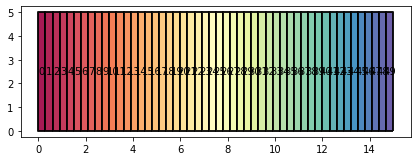

In [3]:
polys = shapely.geometry.Polygon([(0, 0), (0,5), (15, 5), (15, 0)])
splitedData = getSplitedGeoms(polys, 50, 120)

In [4]:
from geoshapes import mergeShape

### mergePolygon
See **help(mergeShape.mergePolygon)** for more details about the parameters
1. mergePolygon require a shapely Polygon / GeoDataFrame (geomData) feature to merge splited/number of geometry.
2. mergePolygon require a number to merge the polygon at number for merging the feature from the given geometry.

In [5]:
#help(mergeShape.mergePolygon)

In [6]:
def plotMergedPolygon(splitedData, mergedNum:int):
    geoData = mergeShape.mergePolygon(splitedData, mergedNum)
    geoData['ids'] = range(len(geoData))
    ax = geoData.plot(figsize = (7,5), alpha = 0.9, cmap = 'Spectral', edgecolor = 'k', linewidth = 2)
    ax.set_title(f'Number of Merged Polygon : {mergedNum}')
    geoData.apply(
        lambda x: ax.annotate(
            text=f"{x.ids+1}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=10),axis=1
        )
    return geoData

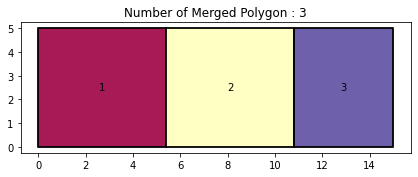

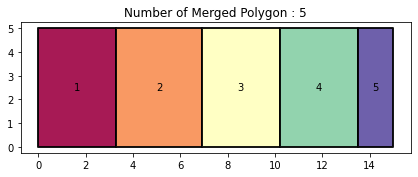

In [7]:
geo3 = plotMergedPolygon(splitedData, 3)
geo5 = plotMergedPolygon(splitedData, 5)